В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі чотири лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [850]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [656]:
medical_df = pd.read_csv('data/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

1. Метод МНК 

In [657]:
def normal_equations(X,y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [658]:
non_smoker_df_age_with_intercept = np.c_[np.ones((non_smoker_df.age.shape[0], 1)), non_smoker_df.age.values]
target = non_smoker_df.charges.values

In [659]:
non_smoker_df_age_with_intercept

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

In [700]:
MNK_coefs = normal_equations(non_smoker_df_age_with_intercept, target)

MNK_coefs

array([-2091.42055657,   267.24891283])

In [661]:
predictions_MNK = np.dot(non_smoker_df_age_with_intercept, MNK_coefs)

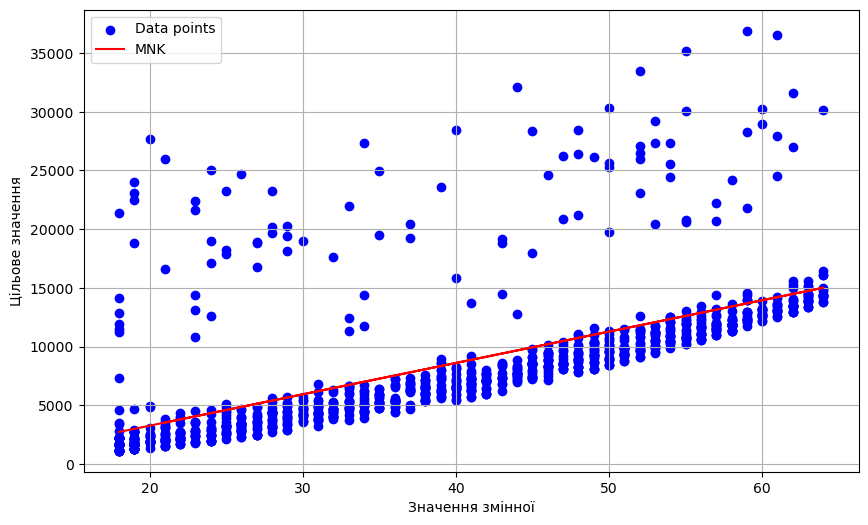

In [662]:
plt.figure(figsize=(10, 6))
plt.scatter(np.expand_dims(non_smoker_df.age, axis=1)[:, 0], target, color='blue', label='Data points')
plt.plot(np.expand_dims(non_smoker_df.age, axis=1)[:, 0], predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

2. Full-Batch градієнтний спуск

In [828]:
def full_batch_gradient_descent(X, y, lr=0.01, epochs=10):
    m, b = 0.0, 0.0
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

learning_rates = [0.001, 0.0006, 0.0001]
results = {}

In [829]:
for lr in learning_rates:
    m, b, errors = full_batch_gradient_descent(np.expand_dims(non_smoker_df.age, axis=1), target, lr, epochs=10)
    results[lr] = (m, b, errors)

best_lr = min(results, key=lambda lr: results[lr][2][-1])
best_m, best_b, best_errors = results[best_lr]

In [831]:
predictions_fbgd = best_m * non_smoker_df.age.values + best_b

best_m, best_b

(217.09829455062746, 4.413216911503922)

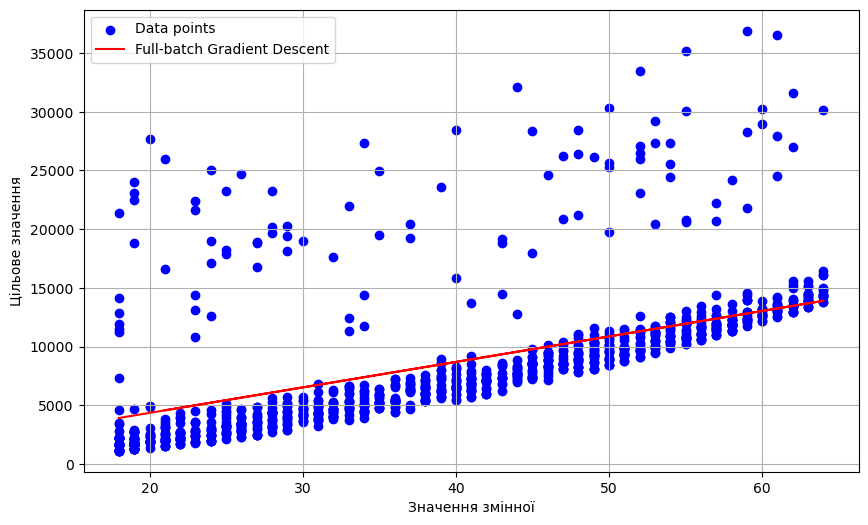

In [832]:
plt.figure(figsize=(10, 6))
plt.scatter(np.expand_dims(non_smoker_df.age, axis=1)[:, 0], target, color='blue', label='Data points')
plt.plot(np.expand_dims(non_smoker_df.age, axis=1)[:, 0], predictions_fbgd, color='red', label='Full-batch Gradient Descent')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

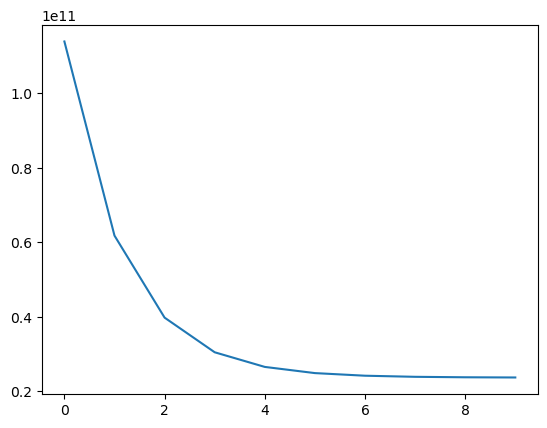

In [833]:
plt.plot(errors);

3. `scikit-learn.LinearRegression`

In [834]:
lin_reg = LinearRegression()

In [835]:
lin_reg

LinearRegression()

In [836]:
lin_reg.fit(non_smoker_df.age.to_frame(), target)

LinearRegression()

In [837]:
lin_reg.intercept_, lin_reg.coef_[0]

(-2091.4205565650827, 267.24891283119956)

In [838]:
predictions_sklearn = lin_reg.predict(non_smoker_df.age.to_frame())

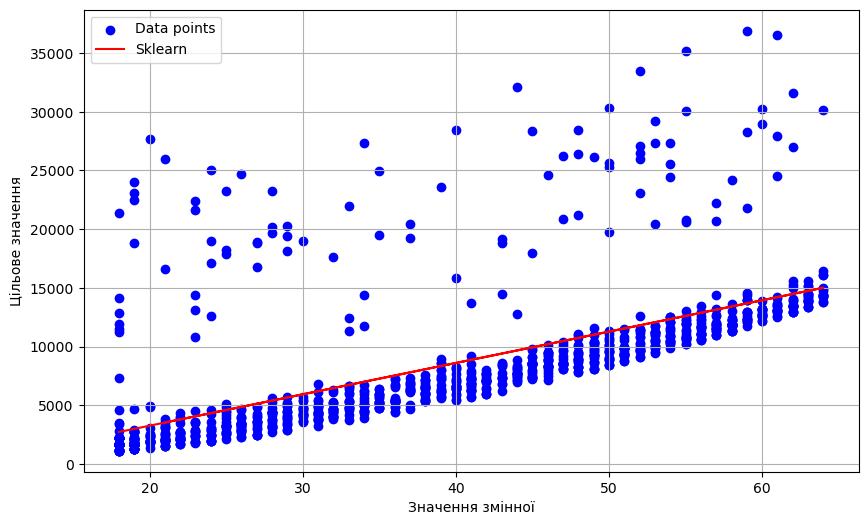

In [839]:
plt.figure(figsize=(10, 6))
plt.scatter(np.expand_dims(non_smoker_df.age, axis=1)[:, 0], target, color='blue', label='Data points')
plt.plot(np.expand_dims(non_smoker_df.age, axis=1)[:, 0], predictions_sklearn, color='red', label='Sklearn')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

Побудова графіку данних `age` проти `charges` в вигляді діаграми розсіювання і лінії регресії.

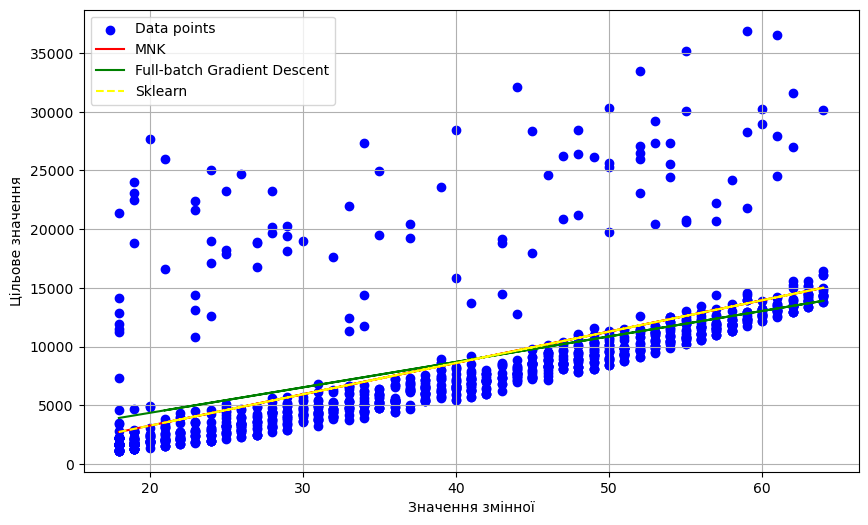

In [849]:
plt.figure(figsize=(10, 6))
plt.scatter(np.expand_dims(non_smoker_df.age, axis=1)[:, 0], target, color='blue', label='Data points')
plt.plot(np.expand_dims(non_smoker_df.age, axis=1)[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(np.expand_dims(non_smoker_df.age, axis=1)[:, 0], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(np.expand_dims(non_smoker_df.age, axis=1)[:, 0], predictions_sklearn, '--' , color='yellow', label='Sklearn')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

Знаходження точності прогнозу за подопомогою RMSE.

In [858]:
def rmse(y, predictions):
    r2 = r2_score(y, predictions)
    rmse = mean_squared_error(y, predictions, squared=False)
    print(f"R² score: {r2:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")

In [862]:
print("For a MNK:")
rmse(target, predictions_MNK)

For a MNK:
R² score: 0.39
Root Mean Squared Error: 4662.51


In [863]:
print("For a Full-batch Gradient Descent method:")
rmse(target, predictions_fbgd)

For a Full-batch Gradient Descent method:
R² score: 0.38
Root Mean Squared Error: 4717.19


In [864]:
print("For a method by sklearn:")
rmse(target, predictions_sklearn)

For a method by sklearn:
R² score: 0.39
Root Mean Squared Error: 4662.51


Висновок: Результати MNK та лінійної регресії з бібліотеки sklearn однакові, оскільки бібліотека sklearn використовує MNK. Full-batch Gradient Descent метод наближається до них, проте не ідентичний, оскільки він дає максимально наближений до ідеальних значень результат.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [867]:
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_target = smoker_df.charges.values

In [868]:
lin_reg.fit(smoker_df.age.to_frame(), smoker_target)

LinearRegression()

In [869]:
lin_reg.intercept_, lin_reg.coef_[0]

(20294.128126915966, 305.2376021098288)

In [870]:
predictions_sklearn = lin_reg.predict(smoker_df.age.to_frame())

In [872]:
print("For a smokers by sklearn:")
rmse(smoker_target, predictions_sklearn)

For a smokers by sklearn:
R² score: 0.14
Root Mean Squared Error: 10711.00


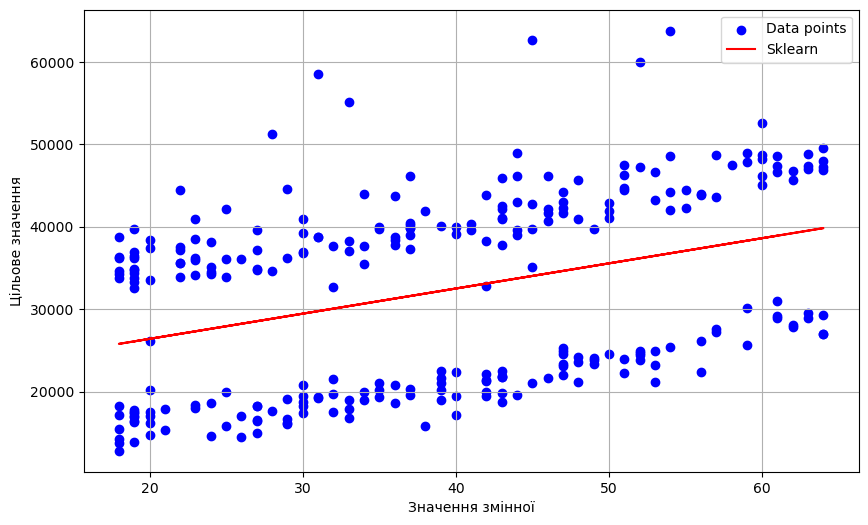

In [873]:
plt.figure(figsize=(10, 6))
plt.scatter(np.expand_dims(smoker_df.age, axis=1)[:, 0], smoker_target, color='blue', label='Data points')
plt.plot(np.expand_dims(smoker_df.age, axis=1)[:, 0], predictions_sklearn, color='red', label='Sklearn')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()